# 1. Combine all Feature Files

In [58]:
import pandas as pd
files=['clenched_data.csv','fist_data.csv','four_data.csv','index_finger_data.csv','okay_data.csv','peace_data.csv','rest_data.csv','rock_data.csv','spread_data.csv','three_data.csv','thumb_data.csv','up_data.csv']

df=pd.DataFrame()
for f in files:
    df=pd.concat([df,pd.read_csv(f)],ignore_index=True)

df

,ch1,ch2,timestamp_ms,label
0,549,525,0,clenched
1,534,488,10,clenched
2,513,529,20,clenched
3,502,514,30,clenched
4,526,490,40,clenched
...,...,...,...,...
71995,505,499,59950,up
71996,546,503,59960,up
71997,523,483,59970,up
71998,510,494,59980,up


#  2. Encode the Labels

- Use LabelEncoder from sklearn.preprocessing to convert gesture names into numeric labels (0–11)

In [59]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['label']=enc.fit_transform(df['label'])
df

,ch1,ch2,timestamp_ms,label
0,549,525,0,0
1,534,488,10,0
2,513,529,20,0
3,502,514,30,0
4,526,490,40,0
...,...,...,...,...
71995,505,499,59950,11
71996,546,503,59960,11
71997,523,483,59970,11
71998,510,494,59980,11


- Print a dictionary mapping of label numbers to gesture names.


In [60]:
enc.classes_ # converted to numeric label from 0 - 11

array(['clenched', 'fist', 'four', 'index_finger', 'okay', 'peace',
       'rest', 'rock', 'spread', 'three', 'thumb', 'up'], dtype=object)

In [61]:
# Method - 1
print(pd.concat([pd.DataFrame(enc.classes_),pd.DataFrame(df['label'].unique())],axis='columns'))

               0   0
0       clenched   0
1           fist   1
2           four   2
3   index_finger   3
4           okay   4
5          peace   5
6           rest   6
7           rock   7
8         spread   8
9          three   9
10         thumb  10
11            up  11


In [62]:
# Method - 2
label_to_gesture={i:label for i,label in enumerate(enc.classes_)}
print(label_to_gesture) 

{0: 'clenched', 1: 'fist', 2: 'four', 3: 'index_finger', 4: 'okay', 5: 'peace', 6: 'rest', 7: 'rock', 8: 'spread', 9: 'three', 10: 'thumb', 11: 'up'}


# 3. Split the Dataset

In [63]:
from sklearn.model_selection import train_test_split
x=df[['ch1','ch2']]
y=df['label']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [64]:
y_test.unique()

array([ 3,  6,  9,  7,  4,  8,  2,  1, 11,  0,  5, 10])

In [65]:
x_train , y_train

(       ch1  ch2
 840    518  494
 61670  522  502
 26694  544  490
 16180  541  527
 2394   546  512
 ...    ...  ...
 7308   505  502
 2389   503  503
 49993  535  525
 52328  512  486
 5743   502  500
 
 [57600 rows x 2 columns],
 840       0
 61670    10
 26694     4
 16180     2
 2394      0
          ..
 7308      1
 2389      0
 49993     8
 52328     8
 5743      0
 Name: label, Length: 57600, dtype: int32)

# 4. Train a Logistic Regression Model

In [66]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial',solver='lbfgs',class_weight='balanced')
model.fit(x_train,y_train)

c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', multi_class='multinomial')

# 5. Evaluate the Model


In [67]:
y_pred=model.predict(x_test)
pd.Series(y_pred).unique()
# OR
# import numpy as np
# np.unique(y_pred)
# as unique() is used for series or array

array([ 9,  8,  2,  0,  6, 10])

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.07      0.00      0.01      1200
           1       0.00      0.00      0.00      1200
           2       0.08      0.08      0.08      1200
           3       0.00      0.00      0.00      1200
           4       0.00      0.00      0.00      1200
           5       0.00      0.00      0.00      1200
           6       0.10      0.01      0.01      1200
           7       0.00      0.00      0.00      1200
           8       0.08      0.48      0.14      1200
           9       0.08      0.39      0.14      1200
          10       0.08      0.02      0.03      1200
          11       0.00      0.00      0.00      1200

    accuracy                           0.08     14400
   macro avg       0.04      0.08      0.03     14400
weighted avg       0.04      0.08      0.03     14400



c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#  6. Visualize Results

In [69]:
confusion_matrix(y_test, y_pred)

array([[  4,   0,  87,   0,   0,   0,  13,   0, 559, 508,  29,   0],
       [  3,   0, 100,   0,   0,   0,   8,   0, 593, 474,  22,   0],
       [  3,   0, 101,   0,   0,   0,  15,   0, 568, 498,  15,   0],
       [  3,   0, 125,   0,   0,   0,   5,   0, 575, 461,  31,   0],
       [  4,   0, 110,   0,   0,   0,   8,   0, 578, 480,  20,   0],
       [  8,   0, 103,   0,   0,   0,   4,   0, 566, 489,  30,   0],
       [  4,   0, 128,   0,   0,   0,   9,   0, 562, 477,  20,   0],
       [  3,   0, 114,   0,   0,   0,   4,   0, 599, 465,  15,   0],
       [  8,   0, 117,   0,   0,   0,   5,   0, 582, 465,  23,   0],
       [  2,   0, 129,   0,   0,   0,   4,   0, 574, 467,  24,   0],
       [  9,   0, 114,   0,   0,   0,   9,   0, 599, 447,  22,   0],
       [  4,   0, 114,   0,   0,   0,   5,   0, 565, 479,  33,   0]],
      dtype=int64)

In [70]:
# Display as a DataFrame for readability
cm_df = pd.DataFrame(cm, index=[f"True {i}" for i in range(len(cm))],
                         columns=[f"Pred {i}" for i in range(len(cm))])

print(cm_df)

         Pred 0  Pred 1  Pred 2  Pred 3  Pred 4  Pred 5  Pred 6  Pred 7  \
True 0        4       0      87       0       0       0      13       0   
True 1        3       0     100       0       0       0       8       0   
True 2        3       0     101       0       0       0      15       0   
True 3        3       0     125       0       0       0       5       0   
True 4        4       0     110       0       0       0       8       0   
True 5        8       0     103       0       0       0       4       0   
True 6        4       0     128       0       0       0       9       0   
True 7        3       0     114       0       0       0       4       0   
True 8        8       0     117       0       0       0       5       0   
True 9        2       0     129       0       0       0       4       0   
True 10       9       0     114       0       0       0       9       0   
True 11       4       0     114       0       0       0       5       0   

         Pred 8  Pred 9 

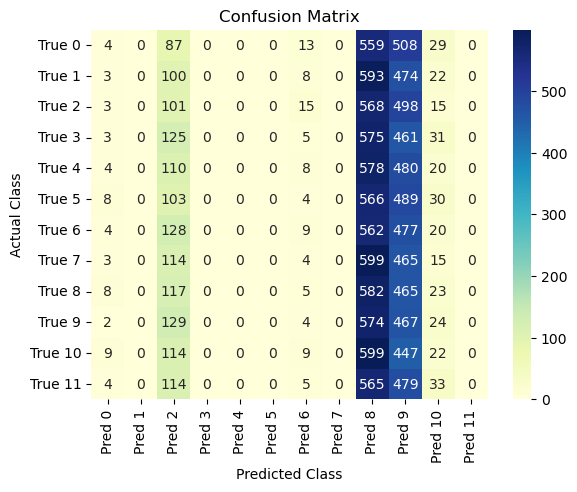

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_df,annot=True,fmt='d',cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()